In [9]:
import numpy as np
import pandas as pd


df  =  pd.read_csv('zoo.data')
    
        
        
        
        

        
    

In [10]:
df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [11]:
df.head()


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics


In [13]:
X = df.values[:, 0:16]
Y = df.values[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)
 




In [14]:
X

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0]])

In [15]:
Y

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2])

In [16]:
clf=DecisionTreeClassifier(criterion='entropy')

In [17]:
X_train

array([[1, 0, 0, ..., 1, 0, 1],
       [0, 1, 1, ..., 1, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 1, ..., 1, 0, 0],
       [1, 0, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 1, 0, 0]])

In [18]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [19]:
pred=clf.predict(X_test)

In [20]:
pred

array([7, 2, 7, 3, 7, 3, 1, 4, 2, 2, 3, 2, 1, 2, 5, 3, 4, 2, 1, 2, 1, 1,
       3, 3, 3, 7, 2, 3, 1, 1, 6])

In [21]:
y_test

array([7, 2, 7, 2, 7, 3, 1, 4, 2, 2, 2, 2, 1, 2, 5, 7, 4, 2, 1, 2, 1, 1,
       2, 2, 5, 7, 2, 3, 1, 1, 6])

In [22]:
print(accuracy_score(y_test,pred))

0.8064516129032258


In [23]:
print(confusion_matrix(y_test,pred))

[[7 0 0 0 0 0 0]
 [0 8 4 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 1 0 1 0 0]
 [0 0 0 0 0 1 0]
 [0 0 1 0 0 0 4]]


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      0.67      0.80        12
           3       0.25      1.00      0.40         2
           4       1.00      1.00      1.00         2
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         1
           7       1.00      0.80      0.89         5

    accuracy                           0.81        31
   macro avg       0.89      0.85      0.82        31
weighted avg       0.95      0.81      0.84        31



In [29]:
from sklearn.tree import DecisionTreeClassifier
model1 =  tree.DecisionTreeClassifier(criterion="entropy")
model1= model1.fit(X_train,y_train)


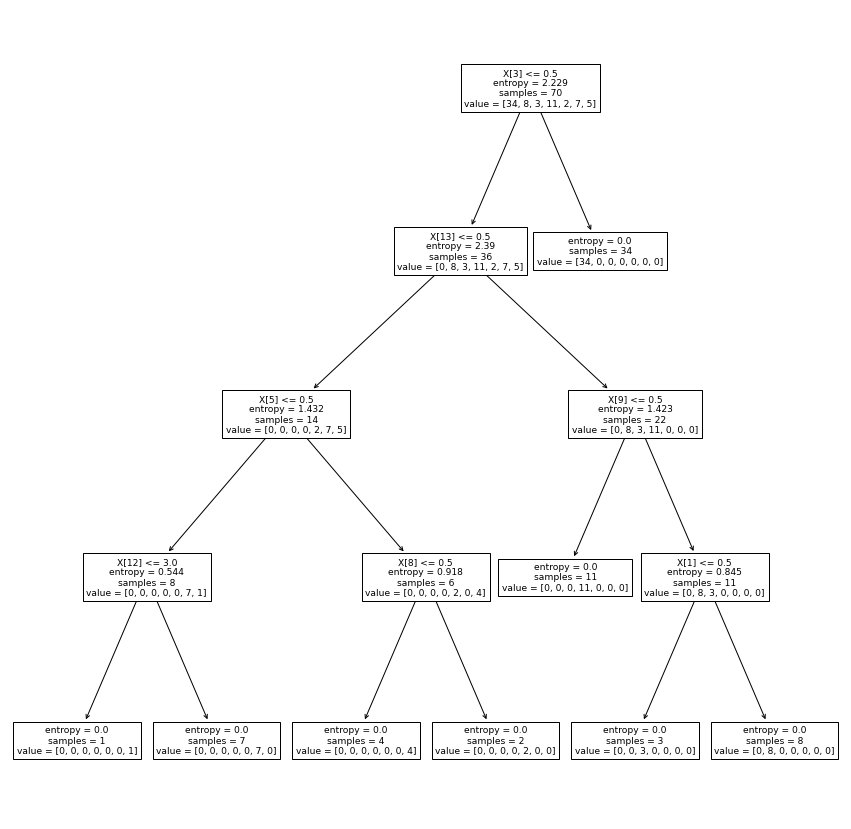

In [30]:
plt.figure(figsize = (15,15))
tree.plot_tree(model1)
plt.show()